In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from plot_tools import *

# Helper functions......

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    
def open_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ModuleNotFoundError: No module named 'plot_tools'


====> Begin processing runs


----> Processing for day:  2020050300 

Processing 2020050300 for fhour 0

Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0


Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0

Saved /work/wicker/CAM_case_studies/2020050300_W_925_zoom.png
Processing 2020050300 for fhour 1

Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0


Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0

Saved /work/wicker/CAM_case_studies/2020050300_W_925_zoom.png
Processing 2020050300 for fhour 2

Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0


Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0

Saved /work/wicker/CAM_case_studies/2020050300_W_925_zoom.png
Processing 2020050300 for fhour 3

Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:  -85.0


Plot Lat Min: 35.0  Lat Max:  40.0  

Plot Lon Min: -92.0  Lon Max:

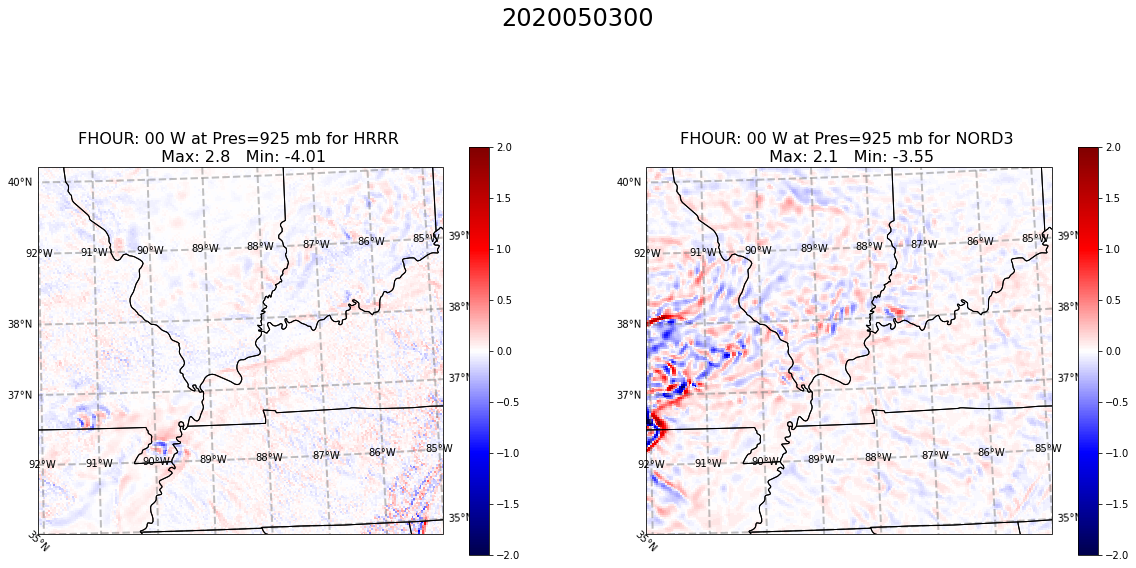

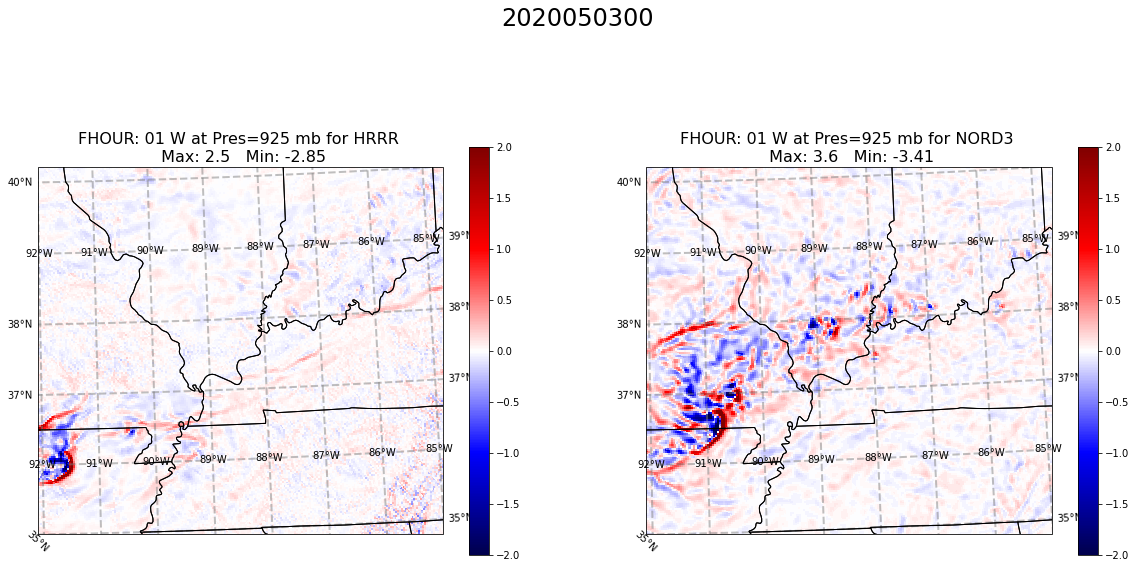

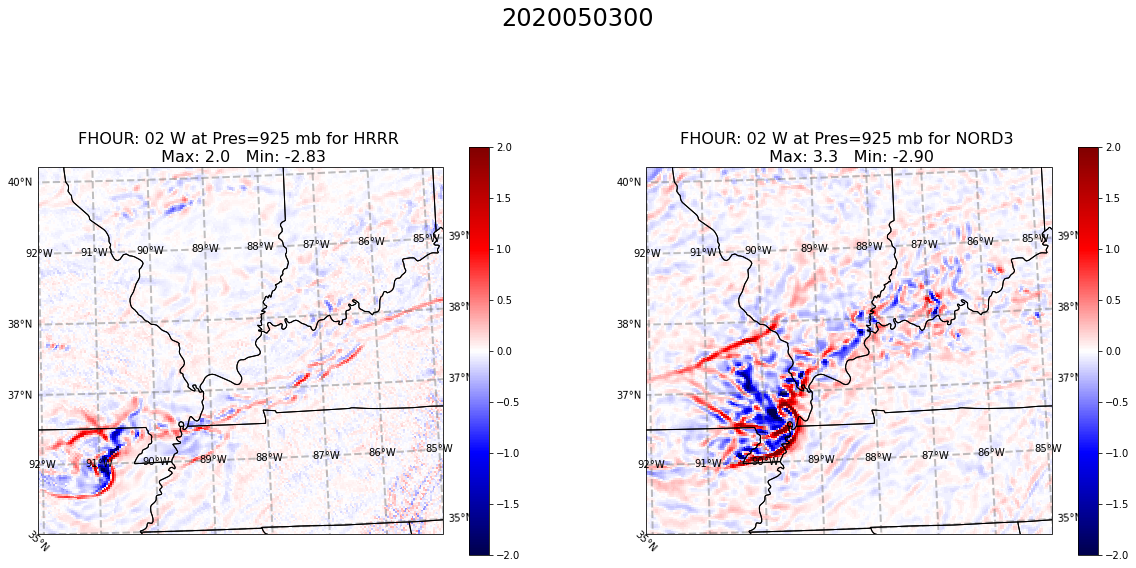

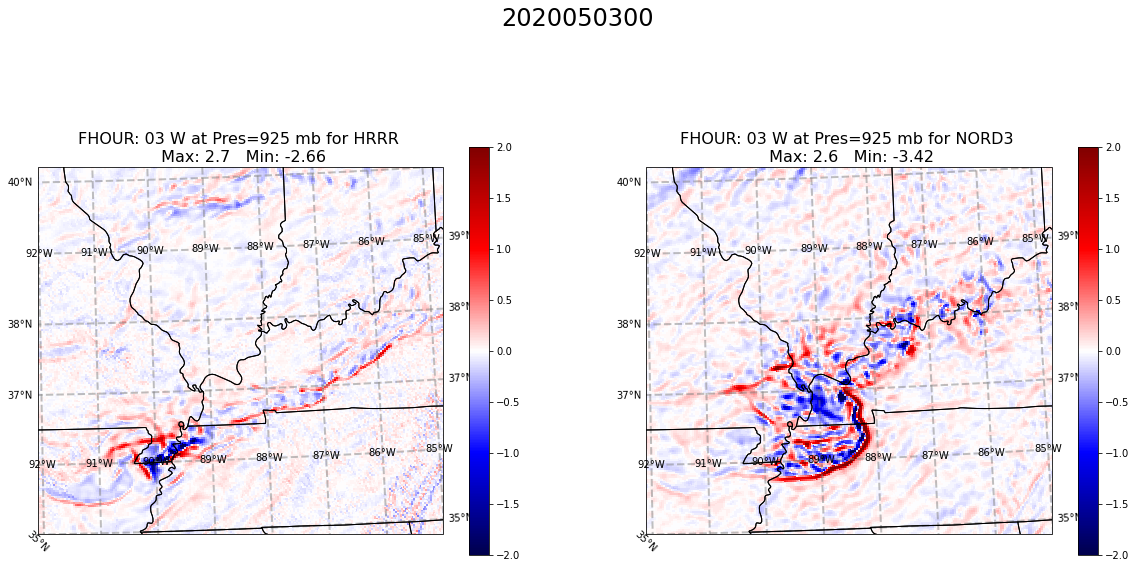

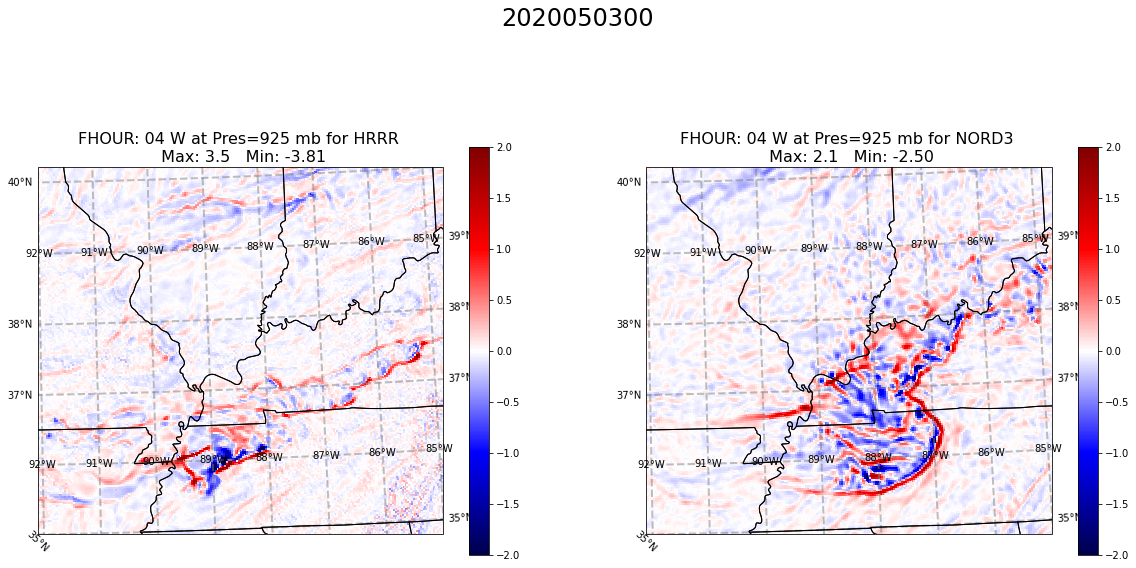

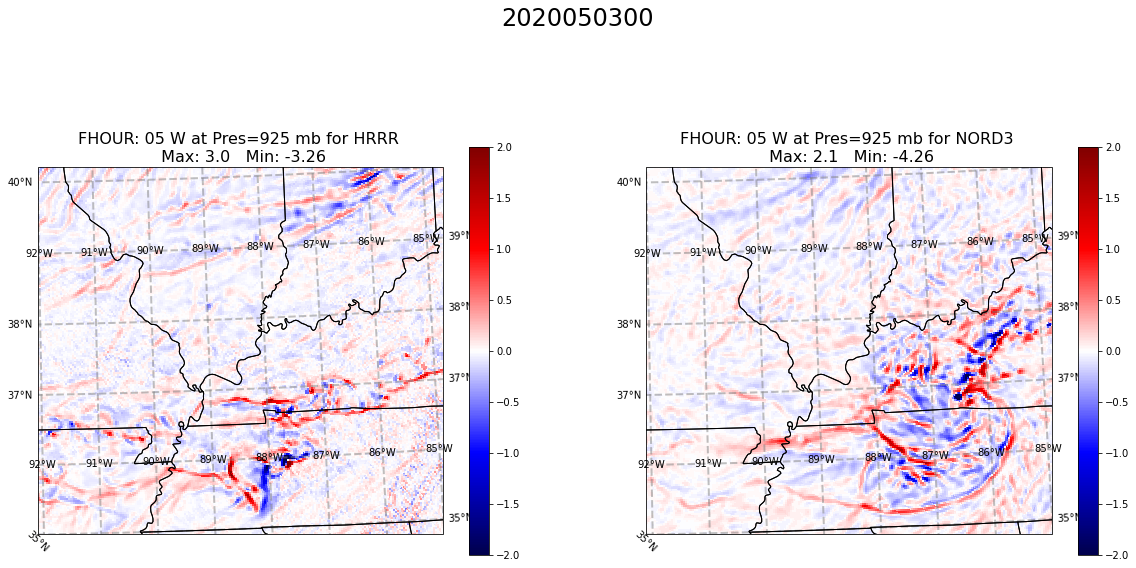

In [17]:
from input_default import input_single as input_config

input_dir  = input_config["input_dir"]
output_dir = input_config["output_dir"]

klevel     =  3

vmin       = -2.
vmax       =  2.
colormap   = 'seismic'
    
#------------------------------------------------------------------------------------
# cut and past from below here
#

print("\n====> Begin processing runs\n")

for day in input_config["cases"]:
        
    print("\n----> Processing for day:  %s \n" % (day))
    run_dir = str(os.path.join(input_dir, day))
    out_dir = str(os.path.join(output_dir, day))

    # Open data sets

    hrrr  = open_mfdataset_list(run_dir+"/hrrr",  "region_*.nc")
    rrfs1 = open_mfdataset_list(run_dir+"/nord3", "region_*.nc")


    # get zoom and fhour

    newlat = input_config["zoom"][day][0:2]
    newlon = input_config["zoom"][day][2:4]
#fhour  = input_config["zoom"][day][4]
    contours = None
    
    for fhour in np.arange(6):
        
        # Plot the HRRR and RRFS data

        fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))
    
        print("Processing %s for fhour %d" % (day, fhour))

        cb_info = plot_w_from_xarray(hrrr, fhour = fhour, klevel=klevel, title='HRRR', ax = axes[0], vmax=vmax, vmin=vmin, colormap=colormap, \
                                    newlat=newlat, newlon=newlon, contours=contours)

        cb_info = plot_w_from_xarray(rrfs1, fhour = fhour, klevel=klevel, title='NORD3', ax = axes[1], vmax=vmax, vmin=vmin, colormap=colormap, \
                                    newlat=newlat, newlon=newlon, contours=contours)

        plt.suptitle(day, fontsize=24)

        plt.savefig("%s_W_%3.3d_zoom.png" % (os.path.join(output_dir, day), hrrr.pres[klevel]/100), dpi=300, bbox_inches='tight')

        print("Saved %s_W_%3.3d_zoom.png" % (os.path.join(output_dir, day), hrrr.pres[klevel]/100))

        
print("\n====> Ended processing runs\n")
